In [2]:
import matplotlib.pylab as plt
import numpy as np
import pandas as pd
import time
import sys
import os

import seaborn as sns
import gensim
from datetime import datetime, date

import django
import platform

if platform.node() == "srv-mcc-apsis":
    sys.path.append('/home/muef/tmv/BasicBrowser/')
else:
    # local paths
    sys.path.append('/Documents/Data/tmv/BasicBrowser/')

os.environ.setdefault("DJANGO_SETTINGS_MODULE", "BasicBrowser.settings")
django.setup()

# import from appended path
import parliament.models as pm
from parliament.tasks import do_search, run_tm
import cities.models as cmodels
import scoping.models as sm
from django.contrib.auth.models import User
from tmv_app.models import *
from utils.tm_mgmt import update_topic_scores
from utils.text import *
from django.db.models import Q, Count, Func, F, Sum, Value, Case, When, IntegerField

from parliament.utils import merge_utterance_paragraphs

In [2]:
save_dir = "./plots/word_counts/"
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)

### importing data

In [3]:
s = pm.Search.objects.get(id=89)

# search 99 = 3 and more mentions of coal

uts = pm.Utterance.objects.filter(search_matches=s).order_by('id')
texts, docsizes, ids = merge_utterance_paragraphs(uts)

# use count vectorizer to count number of occurances

In [5]:
print(len(texts))

from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()

dtm = vectorizer.fit_transform(texts)
vocab = vectorizer.get_feature_names()

9167


In [6]:
SEARCH = re.compile('(?<!Gemeinschaft für )kohle(?!nwasser)(?!nstoff)(?!ndiox)(?!nmonox)(?!rnte)', re.IGNORECASE)
for term in vocab:
    if SEARCH.search(term):
        print(term)

_kohle
abfallkohle
aktivkohle
aktivkohlefilter
aktivkohlefiltern
alkohleinfluß
amerikakohle
anthrazitkohle
anthrazitkohlenvorkommen
antikohlekurs
antikohlepolitik
antikohleäußerungen
ausfuhrkohle
auskohlen
auslandskohle
australienkohle
auszukohlenden
bahnkohlekraftwerks
ballastkohle
ballastkohlenverstromung
ballastkohlesorten
baunkohlenbriketts
baunkohleregion
bekohlen
besatzungskohle
bestandskohlekraftwerken
billigkohle
biokohle
brandkohle
braunkohle
braunkohleabbau
braunkohleabbaufirmen
braunkohleabbaugebiete
braunkohleabbaus
braunkohleabsatz
braunkohleabsatzfeld
braunkohleajatollah
braunkohlealtlasten
braunkohlealtstandorte
braunkohleanlagen
braunkohleanteil
braunkohleanwendung
braunkohlearbeitnehmer
braunkohleausschusses
braunkohleausstieg
braunkohlebasis
braunkohlebedarf
braunkohlebenchmark
braunkohlebenchmarks
braunkohlebereich
braunkohlebereiche
braunkohleberg
braunkohlebergarbeiter
braunkohlebergbau
braunkohlebergbaues
braunkohlebergbaugebieten
braunkohlebergbaus
braunkohleberg

kohleerklärung
kohleerzeugende
kohleerzeugenden
kohleerzeugerländern
kohleerzeugern
kohleerzeugnissen
kohleerzeugung
kohleetat
kohleeuphorie
kohleexperte
kohleexport
kohleexporte
kohleexporten
kohleexportes
kohleexporteur
kohleexportierenden
kohleexportland
kohleexportländer
kohleexportnationen
kohleexportpreis
kohleexports
kohleexportsubventionen
kohlefachleute
kohlefans
kohlefaserstoffe
kohlefaserverbundstofftechnologie
kohlefaserverbundtechnologie
kohlefaserverbundwerkstoff
kohlefaserverbundwerkstoffen
kohlefaserverstärkte
kohlefaserwerkstoffen
kohlefehlbedarfs
kohlefeind
kohlefeindlich
kohlefeindliche
kohlefelder
kohlefeldern
kohlefeldes
kohlefeuerung
kohlefeuerungsanlage
kohlefeuerungsanlagen
kohlefeuerungstechnologien
kohlefilter
kohlefiltration
kohlefinanzierung
kohlefinanzierungsbzw
kohlefinanzierungsinstrument
kohlefinanzierungssteuer
kohlefinanzierungsteuer
kohleflöz
kohleflöze
kohleflözen
kohleflözgas
kohleflözgestein
kohleflözgesteinen
kohleflüssigung
kohlefonds
kohlefor
ko

kohleschachtes
kohleschaufelbagger
kohleschiff
kohleschiffe
kohleschiffen
kohleschippen
kohleschleudern
kohleschlot
kohleschlote
kohleschlüssel
kohleschutzzoll
kohleschätzungen
kohleseite
kohlesektor
kohlesektors
kohlesicherheit
kohlesicherheits
kohlesicherheitssockel
kohlesicherung
kohlesicherungspolitik
kohlesituation
kohlesockel
kohlesockels
kohlesog
kohlesolidarität
kohlesonderlasten
kohlesorten
kohlesparte
kohlespezifischen
kohlespitzengespräch
kohlestaaten
kohlestandort
kohlestandorten
kohlestandortprogramm
kohlestaub
kohlestaubverfeuerung
kohlestaubvergasung
kohlesteuer
kohlestillegungsrunde
kohlestoffarme
kohlestoffausstoß
kohlestoffe
kohlestrategie
kohlestrom
kohlestromanteil
kohlestromautobahnen
kohlestromerzeugern
kohlestromindustrie
kohlestromkonzerne
kohlestrommengen
kohlestromproduktion
kohlestroms
kohlesubstanz
kohlesubvention
kohlesubventionen
kohlesubventionierung
kohlesubventionierungssystem
kohlesubventionsmittel
kohlesubventionspolitik
kohlesubventionspolitischen
ko

sudetenkohle
sudetenkohlen
südafrikakohle
tschechenkohle
uskohlenimporte
verbandskohlentarifs
verkohlen
verkohlerei
verstromungskohle
vollwertkohle
warndtkohle
welthandelskohle
welthandelssteinkohle
weltkohleförderung
weltkohlehandel
weltkohlemarkt
weltkohlemarktes
weltkohlemärkte
weltkohlen
weltkohlenmarkt
weltkohlenpreis
weltkohlepreis
weltkohlepreise
weltkohleproduktion
weltkohlevorräte
weltkokskohlemarkt
weltmarktkohle
weltsteinkohlehandel
westkohle
wiedersehenskohle
winterkohlen
zumkohle
überseekohle


In [7]:
ind = vocab.index("kohle")

In [8]:
occurrences = np.array(dtm.T[ind].todense())

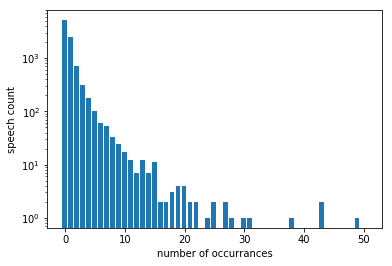

In [11]:
bins=np.arange(-1,51) + 0.5
histogram = plt.hist(occurrences[0], bins=bins, log=True, width=0.8)
plt.ylabel("speech count")
plt.xlabel("number of occurrences")

In [13]:
histogram[0]

array([5.114e+03, 2.484e+03, 7.080e+02, 3.120e+02, 1.810e+02, 1.000e+02,
       6.100e+01, 5.300e+01, 3.300e+01, 2.400e+01, 1.700e+01, 1.200e+01,
       7.000e+00, 1.200e+01, 7.000e+00, 1.100e+01, 2.000e+00, 2.000e+00,
       3.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
       1.000e+00, 2.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
       1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00])

# use regular expression to count number of occurrences

In [4]:
SEARCH = re.compile('(?<!Gemeinschaft für )kohle(?!nwasser)(?!nstoff)(?!ndiox)(?!nmonox)(?!rnte)', re.IGNORECASE)

occurrences_re = np.zeros(len(texts))
for i, text in enumerate(texts):
    occurrences_re[i] = len(SEARCH.findall(text))

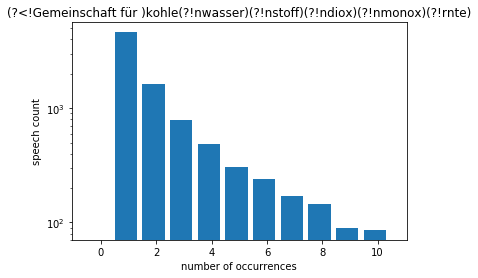

In [5]:
bins=np.arange(-1,11) + 0.5
plt.hist(occurrences_re, bins=bins, log=True, width=0.8)
plt.title("(?<!Gemeinschaft für )kohle(?!nwasser)(?!nstoff)(?!ndiox)(?!nmonox)(?!rnte)")
plt.ylabel("speech count")
plt.xlabel("number of occurrences")
plt.savefig(save_dir + 'kohle_counts_log.png')

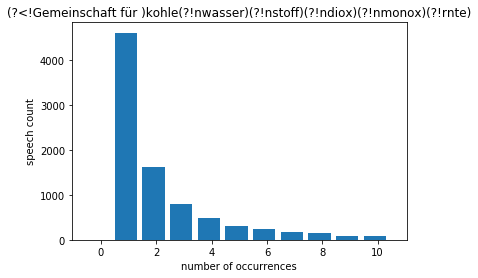

In [6]:
plt.hist(occurrences_re, bins=bins, width=0.8)
plt.ylabel("speech count")
plt.xlabel("number of occurrences")
plt.title("(?<!Gemeinschaft für )kohle(?!nwasser)(?!nstoff)(?!ndiox)(?!nmonox)(?!rnte)")
plt.savefig(save_dir + 'kohle_counts.png')

In [8]:
occurrences_re

array([ 1.,  1.,  1., ...,  1.,  1., 12.])

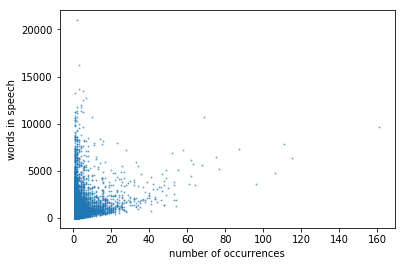

In [9]:
#speech length:

speech_length = [len(text.split(" ")) for text in texts]

plt.scatter(occurrences_re, speech_length, s=1, alpha=0.5)
plt.ylabel("words in speech")
plt.xlabel("number of occurrences")

# make new search with only double and more occurrences

In [21]:
uts_new = []
for i, ut in enumerate(uts):
    if occurrences_re[i] > 2:
        uts_new.append(ut)
        
print(len(uts_new))

1350


In [22]:
user1 =  User.objects.get(username='muef')
coal_project = sm.Project.objects.get(id=134)

search_regex = '(?<!Gemeinschaft für )kohle(?!nwasser)(?!nstoff)(?!ndiox)(?!nmonox)(?!rnte)'
search_object_type = 2
search_object_text = 'utterance'

# search in older protocols
s, created = pm.Search.objects.get_or_create(
                title="Kohle search all periods - min 6 occurrences in utterance",
                text=search_regex,
                creator=user1,
                document_source="updated sources",
                search_object_type=search_object_type,
                project=coal_project)

s.utterance_count = len(uts_new)
par_count = pm.Paragraph.objects.filter(utterance__in=uts_new).count()
print(par_count)
print(len(uts_new))
s.par_count = par_count
s.save(force_update=True)
Through = pm.Utterance.search_matches.through
tms = [Through(utterance=u, search=s) for u in uts_new]
Through.objects.bulk_create(tms)
s.save()

print(s.par_count)
print(s.utterance_count)
print(s.runstats_set.all())
print(s.id)

16325
1350
16325
1350
<QuerySet []>
115


In [42]:
pm.Search.objects.get(id=115).delete()

(1351,
 {'parliament.Document_search_matches': 0,
  'parliament.Paragraph_search_matches': 0,
  'parliament.Search': 1,
  'parliament.Search_speaker_regions': 0,
  'parliament.Utterance_search_matches': 1350})